In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 


import warnings
warnings.filterwarnings("ignore")

## 1. Import data and processing

In [2]:
data = pd.read_excel("Credit.xlsx") #import data

In [3]:
from copy import deepcopy
data_2 = deepcopy(data)    #copy data into another copy for processing

In [4]:
data_2.head(5)

,ID,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
0,1,1. Có khả năng trả nợ,1. Nam,300000.0,300.0,5. Đầu tư chứng khoán,1. Độc Thân,6.0,28.0,18.0,32.0,1. Có TSĐB,2. Thuê nhà,0. Nước ngoài
1,2,0. Không có khả năng trả nợ,2. Nữ,600000.0,120.0,1. Tiêu dùng,1. Độc Thân,3.0,26.0,12.0,14.0,0. Không có TSĐB,2. Thuê nhà,1. Việt Nam
2,3,1. Có khả năng trả nợ,1. Nam,500000.0,500.0,2. Mua nhà,2. Có gia đình,8.0,32.0,24.0,80.0,1. Có TSĐB,1. Đã mua nhà,1. Việt Nam
3,4,1. Có khả năng trả nợ,2. Nữ,400000.0,40.0,4. Học tập,1. Độc Thân,2.0,24.0,12.0,8.0,1. Có TSĐB,2. Thuê nhà,1. Việt Nam
4,5,0. Không có khả năng trả nợ,1. Nam,500000.0,150.0,5. Đầu tư chứng khoán,3. Ly hôn,2.0,32.0,12.0,NaN,0. Không có TSĐB,2. Thuê nhà,1. Việt Nam


In [5]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                1275 non-null   int64  
 1   Kha nang tra no                   1275 non-null   object 
 2   Gioi tinh                         1275 non-null   object 
 3   Hoa don dien/Thang                1247 non-null   float64
 4   So tien vay (trieu vnd)           1254 non-null   float64
 5   Muc dich vay                      1275 non-null   object 
 6   Gia dinh                          1275 non-null   object 
 7   Thoi gian tai cong viec hien tai  1248 non-null   float64
 8   Tuoi                              1266 non-null   float64
 9   Thoi gian vay (Thang)             1269 non-null   float64
 10  Thu nhap  (trieu vnd)             1253 non-null   float64
 11  TSĐB                              1275 non-null   object 
 12  Loai n

In [6]:
#put data in digital form
data_2 = data_2.iloc[:,1:]
for i in data_2.columns:
    if data_2[i].dtype == 'object':  # Check if column contains string values
        data_2[i] = data_2[i].apply(lambda x: str(x).split('-')[0])
        data_2[i] = data_2[i].apply(lambda x: str(x).split('.')[0])
data_2.head(5)

,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
0,1,1,300000.0,300.0,5,1,6.0,28.0,18.0,32.0,1,2,0
1,0,2,600000.0,120.0,1,1,3.0,26.0,12.0,14.0,0,2,1
2,1,1,500000.0,500.0,2,2,8.0,32.0,24.0,80.0,1,1,1
3,1,2,400000.0,40.0,4,1,2.0,24.0,12.0,8.0,1,2,1
4,0,1,500000.0,150.0,5,3,2.0,32.0,12.0,NaN,0,2,1


In [7]:
# Get by condition and conditional operator
df = data_2[(data_2['Tuoi '] <18) | (data_2['Tuoi ']>=60)].index 
data_2.drop(df, inplace = True) 
data_2.head(5)

,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
0,1,1,300000.0,300.0,5,1,6.0,28.0,18.0,32.0,1,2,0
1,0,2,600000.0,120.0,1,1,3.0,26.0,12.0,14.0,0,2,1
2,1,1,500000.0,500.0,2,2,8.0,32.0,24.0,80.0,1,1,1
3,1,2,400000.0,40.0,4,1,2.0,24.0,12.0,8.0,1,2,1
4,0,1,500000.0,150.0,5,3,2.0,32.0,12.0,NaN,0,2,1


In [8]:
data_2.isnull().any()

Kha nang tra no                     False
Gioi tinh                           False
Hoa don dien/Thang                   True
So tien vay (trieu vnd)              True
Muc dich vay                        False
Gia dinh                            False
Thoi gian tai cong viec hien tai     True
Tuoi                                 True
Thoi gian vay (Thang)                True
Thu nhap  (trieu vnd)                True
TSĐB                                False
Loai nha o                          False
Quốc tịch                           False
dtype: bool

In [9]:
total = data_2.isnull().sum().sort_values(ascending=False)
percent = (data_2.isnull().sum()/data_2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.head()

,Total,Percentage
Hoa don dien/Thang,27,0.021916
Thoi gian tai cong viec hien tai,26,0.021104
Thu nhap (trieu vnd),22,0.017857
So tien vay (trieu vnd),21,0.017045
Tuoi,9,0.007305


In [10]:
data_2['Hoa don dien/Thang'].fillna(data_2['Hoa don dien/Thang'].median(), inplace=True)
data_2['Thu nhap  (trieu vnd)'].fillna(data_2['Thu nhap  (trieu vnd)'].median(), inplace=True)
data_2['Thoi gian vay (Thang)'].fillna(data_2['Thoi gian vay (Thang)'].median(), inplace=True)
data_2['So tien vay (trieu vnd)'].fillna(data_2['So tien vay (trieu vnd)'].median(), inplace=True)
data_2['Tuoi '].fillna(data_2['Tuoi '].median(), inplace=True)
data_2['Thoi gian tai cong viec hien tai'].fillna(data_2['Thoi gian tai cong viec hien tai'].median(), inplace=True)


## 2. Descriptive statistics

In [11]:
data_2["Kha nang tra no"].value_counts() 

1    723
0    509
Name: Kha nang tra no, dtype: int64

According to the data set, there are 723 people who are able to repay, 509 people are not able to pay their debts.

In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1273
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Kha nang tra no                   1232 non-null   object 
 1   Gioi tinh                         1232 non-null   object 
 2   Hoa don dien/Thang                1232 non-null   float64
 3   So tien vay (trieu vnd)           1232 non-null   float64
 4   Muc dich vay                      1232 non-null   object 
 5   Gia dinh                          1232 non-null   object 
 6   Thoi gian tai cong viec hien tai  1232 non-null   float64
 7   Tuoi                              1232 non-null   float64
 8   Thoi gian vay (Thang)             1232 non-null   float64
 9   Thu nhap  (trieu vnd)             1232 non-null   float64
 10  TSĐB                              1232 non-null   object 
 11  Loai nha o                        1232 non-null   object 
 12  Quốc t

In [13]:
 #classify quantitative variables
numerical = ['Hoa don dien/Thang','So tien vay (trieu vnd)','Thoi gian tai cong viec hien tai','Tuoi ',
                      'Thoi gian vay (Thang)','Thu nhap  (trieu vnd)']
print('Number of numerical features: ', len(numerical))
#descriptive statistics of numerical variables
data_2[numerical].describe()

Number of numerical features:  6


,Hoa don dien/Thang,So tien vay (trieu vnd),Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd)
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,541355.519481,216.655844,4.667208,29.257305,14.879058,35.059253
std,203314.205983,195.343897,3.278262,5.672588,6.916878,27.350846
min,200000.000000,20.000000,1.000000,20.000000,6.000000,6.000000
25%,400000.000000,80.000000,2.000000,25.000000,12.000000,15.000000
50%,500000.000000,120.000000,4.000000,28.000000,12.000000,20.000000
75%,700000.000000,300.000000,7.000000,34.000000,18.000000,40.000000
max,1000000.000000,800.000000,15.000000,45.000000,36.000000,120.000000


In [14]:
##classify categorical variables
categorical = ['Kha nang tra no','Gioi tinh','Muc dich vay','Gia dinh','TSĐB','Loai nha o','Quốc tịch']
print('Number of numerical features: ', len(categorical))
#descriptive statistics of categorical variables
data_2[categorical].describe()

Number of numerical features:  7


,Kha nang tra no,Gioi tinh,Muc dich vay,Gia dinh,TSĐB,Loai nha o,Quốc tịch
count,1232,1232,1232,1232,1232,1232,1232
unique,2,2,5,4,2,2,2
top,1,1,5,1,1,2,1
freq,723,664,304,622,748,908,983


In [15]:
df=pd.DataFrame(data_2)

# Categorical data visualization

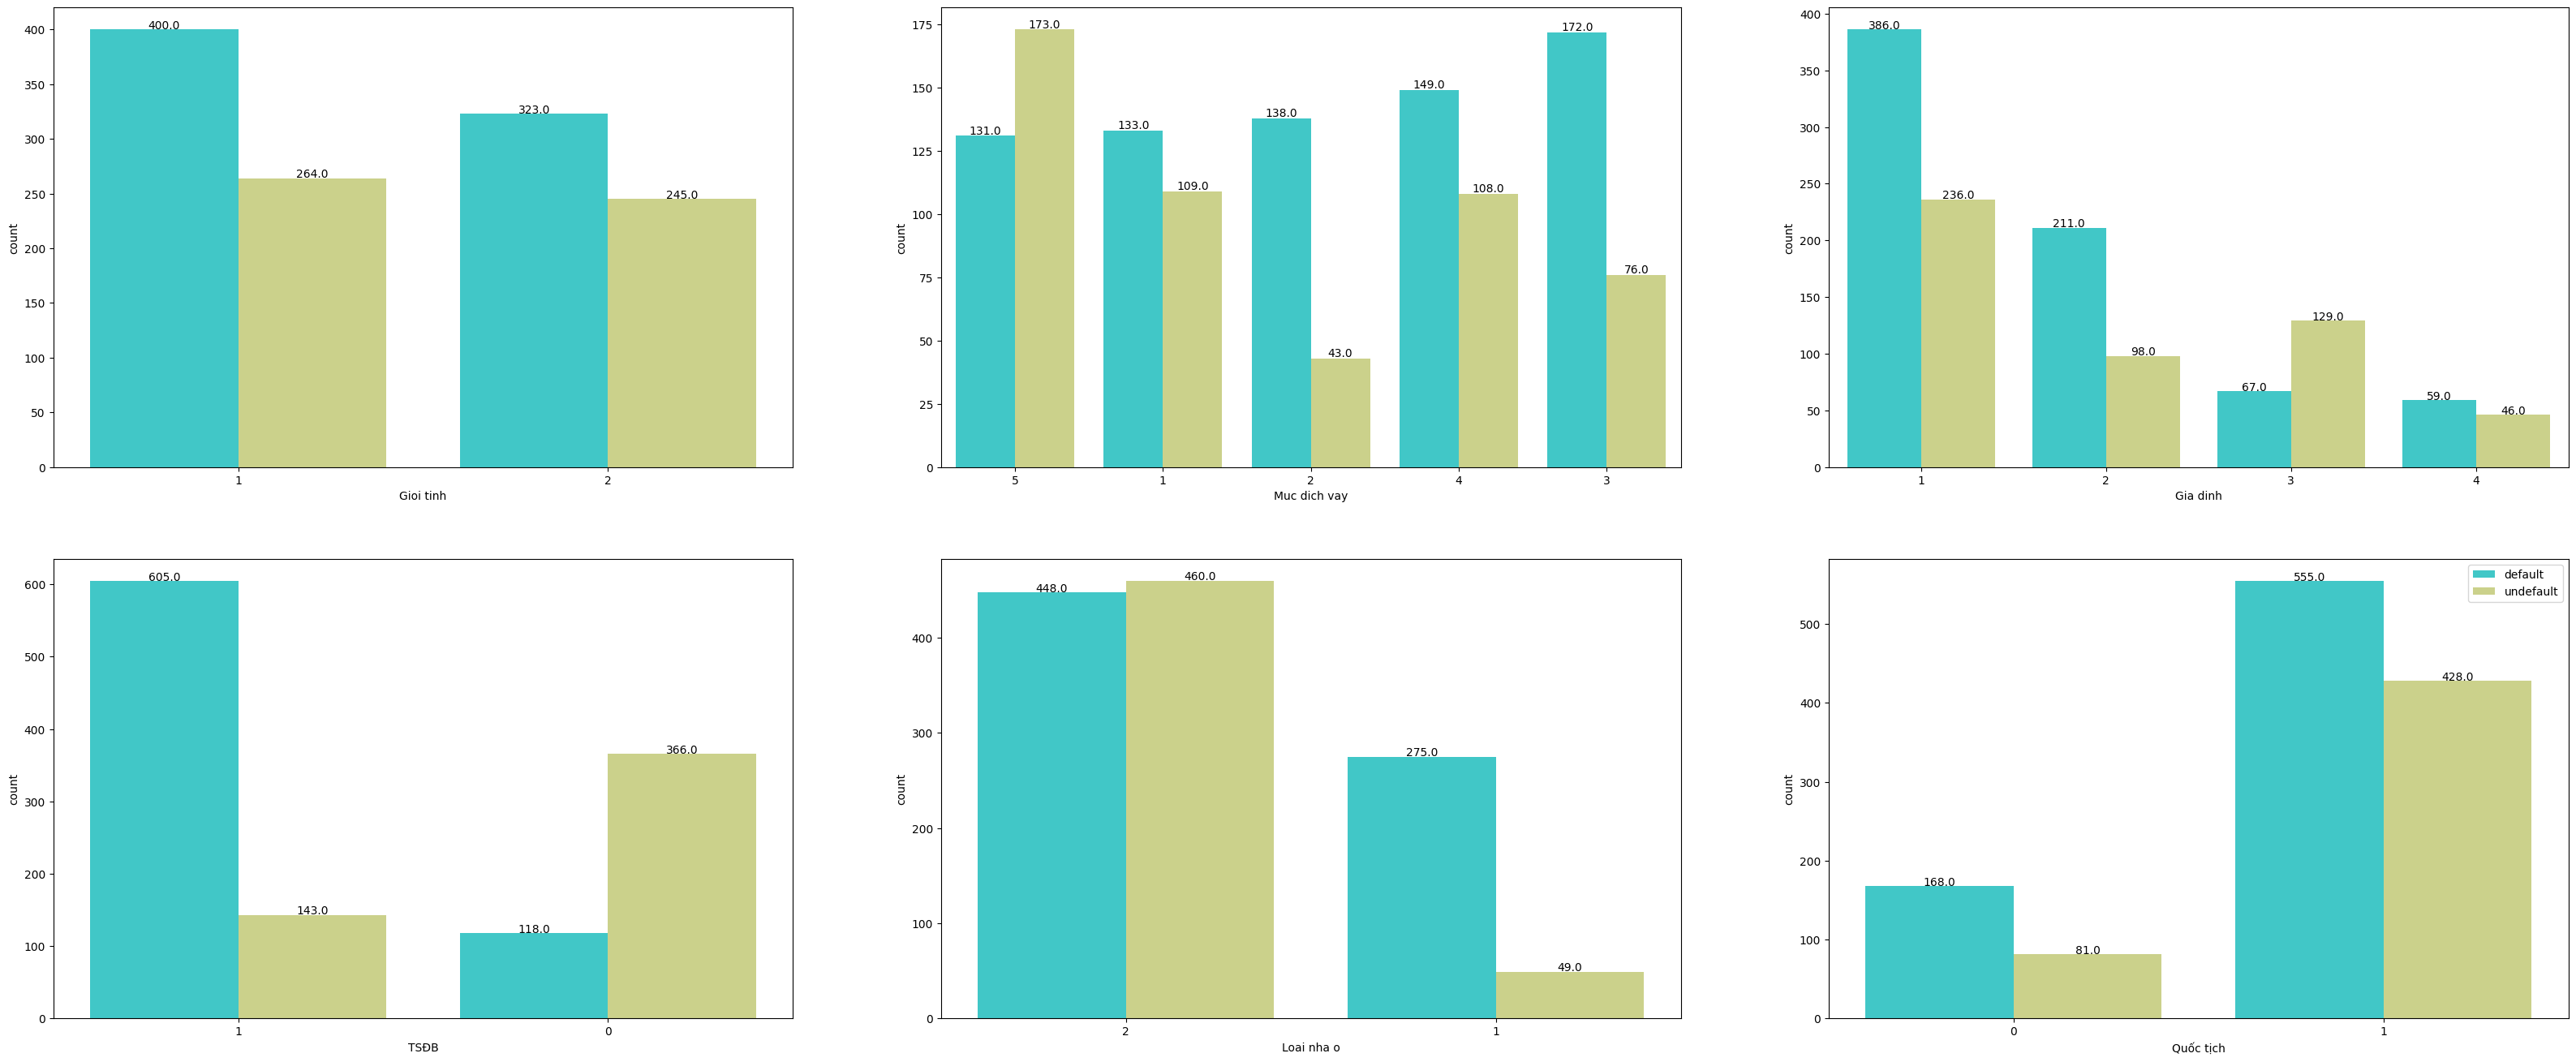

In [16]:
plt.figure(figsize=(40,25))
def count(categorical_features):
  x=1
  for i in categorical_features:
    plt.subplot(3,3,x)
    ax = sns.countplot(x=i,data=data_2, palette='rainbow',hue='Kha nang tra no')
    for rect in ax.patches:
      ax.text(rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 10)
    plt.legend([],[], frameon=False)
    x+=1
  plt.legend(['default', 'undefault'])
  plt.savefig('Data visualization.png')
  

count(['Gioi tinh', 'Muc dich vay', 'Gia dinh','TSĐB', 'Loai nha o', 'Quốc tịch'
       ])

Text(0.5, 1.0, 'Giới tính của khách hàng')

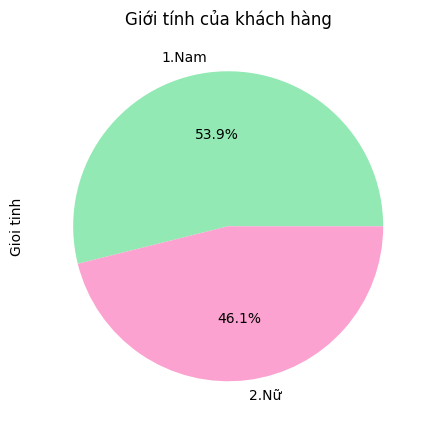

In [17]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#92E9B3','#FBA2D0']
labels = ['1.Nam', '2.Nữ']
df['Gioi tinh'].value_counts().plot(kind='pie',labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Giới tính của khách hàng')


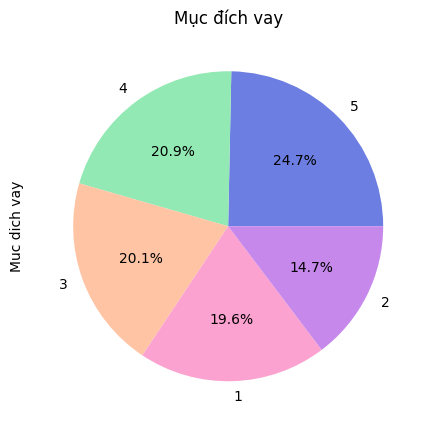

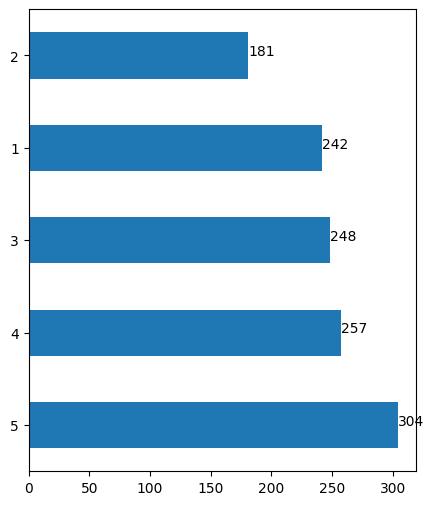

In [18]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#6C7EE1', '#92E9B3','#FFC4A4','#FBA2D0','#C688EB']
df['Muc dich vay'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Mục đích vay')

plt.figure(figsize = (5, 6))
ax = df['Muc dich vay'].value_counts().plot(kind='barh')
for index, value in enumerate(df['Muc dich vay'].value_counts()):
    ax.text(value, index, str(value))


Text(0.5, 1.0, 'Gia đình')

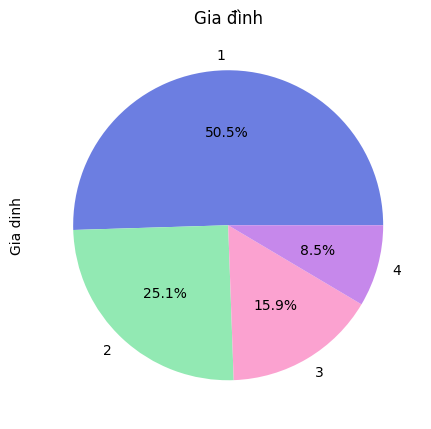

In [19]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#6C7EE1', '#92E9B3','#FBA2D0','#C688EB']
df['Gia dinh'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Gia đình')

Text(0.5, 1.0, 'Tài sản đảm bảo')

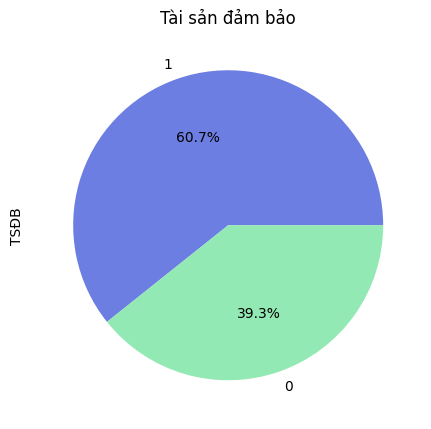

In [20]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#6C7EE1', '#92E9B3']
df['TSĐB'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Tài sản đảm bảo')

Text(0.5, 1.0, 'Loại nhà ở')

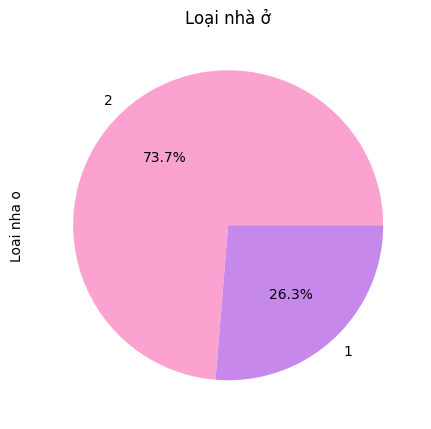

In [21]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#FBA2D0','#C688EB']
df['Loai nha o'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Loại nhà ở')

Text(0.5, 1.0, 'Quốc tịch')

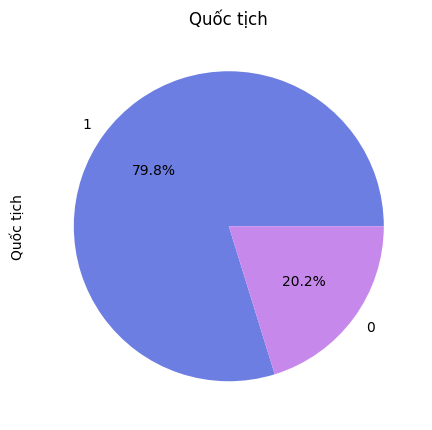

In [22]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#6C7EE1','#C688EB']
df['Quốc tịch'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Quốc tịch')

Text(0.5, 1.0, 'Kha nang tra no')

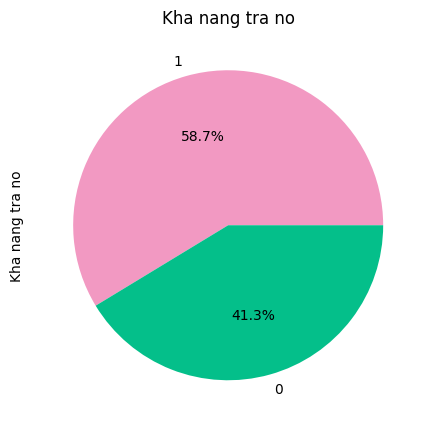

In [23]:
# Categorical data visualization
plt.figure(figsize = (5, 6))
colors = ['#F299C2', '#04BF8A']
df['Kha nang tra no'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title('Kha nang tra no')

## 4. Correlation

In [24]:
#reformat data type
df = df.astype('int64')

In [25]:
#Autocorrelation test
cor = df.astype('float64').corr()
cor

,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
Kha nang tra no,1.000000,-0.034164,-0.491128,-0.042060,-0.125493,-0.123995,0.274464,0.095636,-0.142469,0.430572,0.560416,-0.317740,-0.089792
Gioi tinh,-0.034164,1.000000,-0.170979,-0.075139,-0.141750,-0.033682,-0.010919,-0.193594,0.089186,-0.062576,-0.182899,0.005092,0.339792
Hoa don dien/Thang,-0.491128,-0.170979,1.000000,0.307715,-0.131463,0.153701,0.026942,0.173019,0.066552,-0.113057,-0.280366,0.043537,-0.051742
So tien vay (trieu vnd),-0.042060,-0.075139,0.307715,1.000000,0.047535,0.216092,0.202506,0.371474,0.367213,0.408019,0.095085,0.174548,-0.075076
Muc dich vay,-0.125493,-0.141750,-0.131463,0.047535,1.000000,0.099306,-0.040225,0.058505,0.104635,-0.063254,-0.005077,0.120298,-0.208538
Gia dinh,-0.123995,-0.033682,0.153701,0.216092,0.099306,1.000000,0.337075,0.499152,0.077181,0.303507,-0.152995,-0.180832,-0.070973
Thoi gian tai cong viec hien tai,0.274464,-0.010919,0.026942,0.202506,-0.040225,0.337075,1.000000,0.392387,0.149800,0.360708,0.211456,-0.502323,-0.059131
Tuoi,0.095636,-0.193594,0.173019,0.371474,0.058505,0.499152,0.392387,1.000000,-0.038481,0.446549,0.117399,-0.163430,-0.077329
Thoi gian vay (Thang),-0.142469,0.089186,0.066552,0.367213,0.104635,0.077181,0.149800,-0.038481,1.000000,0.043583,-0.159258,0.151944,-0.026636
Thu nhap (trieu vnd),0.430572,-0.062576,-0.113057,0.408019,-0.063254,0.303507,0.360708,0.446549,0.043583,1.000000,0.285876,-0.161091,0.011959


In [26]:
#Test the correlation of the independent variables with the dependent variable
pd.DataFrame(df.astype('float64').corr().iloc[1:,0])

,Kha nang tra no
Gioi tinh,-0.034164
Hoa don dien/Thang,-0.491128
So tien vay (trieu vnd),-0.042060
Muc dich vay,-0.125493
Gia dinh,-0.123995
Thoi gian tai cong viec hien tai,0.274464
Tuoi,0.095636
Thoi gian vay (Thang),-0.142469
Thu nhap (trieu vnd),0.430572
TSĐB,0.560416


# 5. classify target variables and attributes

In [27]:
target = ['Kha nang tra no']
features = [ 'Hoa don dien/Thang','Gia dinh','Muc dich vay', 'Thoi gian tai cong viec hien tai','Thoi gian vay (Thang)','Thu nhap  (trieu vnd)','TSĐB','Loai nha o']
print('Target: ', target)
print('Features: ', features)

categorical_features = [x for x in data.columns if (x not in features and x != 'default')]
print('Number of numerical features: ', len(features))

Target:  ['Kha nang tra no']
Features:  ['Hoa don dien/Thang', 'Gia dinh', 'Muc dich vay', 'Thoi gian tai cong viec hien tai', 'Thoi gian vay (Thang)', 'Thu nhap  (trieu vnd)', 'TSĐB', 'Loai nha o']
Number of numerical features:  8


# 6. Data division and scale 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [29]:
# Hàm vẽ đường ROC-AUC
def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

In [30]:
X = df[features].values
y = df[target].values

n_state = 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=n_state) #Train 30% , test 70%

In [31]:
from sklearn.preprocessing import StandardScaler
 
# Call scale function
sc_X = StandardScaler()
#Scale train set
X_train = sc_X.fit_transform(X_train)
# Scale test set
X_test = sc_X.fit_transform(X_test)

In [32]:
X

array([[300000,      1,      5, ...,     32,      1,      2],
       [600000,      1,      1, ...,     14,      0,      2],
       [500000,      2,      2, ...,     80,      1,      1],
       ...,
       [600000,      2,      3, ...,     60,      0,      2],
       [300000,      1,      5, ...,     32,      1,      1],
       [400000,      3,      4, ...,     20,      1,      1]], dtype=int64)

 # 6. UPSAMPLING and LOGISTIC

In [33]:
#testing accuracy in learning ability, making predictions

LR_classifier1 = LogisticRegression(multi_class='multinomial',random_state=n_state)

LR_classifier1.fit(X_train, y_train.ravel())

y_pred = LR_classifier1.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
     0    1
0  126   15
1   28  201 

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       141
           1       0.93      0.88      0.90       229

    accuracy                           0.88       370
   macro avg       0.87      0.89      0.88       370
weighted avg       0.89      0.88      0.88       370

Logistic Regression accuracy:  0.8838


# UPSAMPLING

In [34]:
data_majority = df[df['Kha nang tra no']==1]
data_minority = df[df['Kha nang tra no']==0]

In [35]:
print('class 0:', data_majority.shape)
print('class 1:', data_minority.shape)

class 0: (723, 13)
class 1: (509, 13)


In [36]:
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, replace = True, n_samples = data_majority.shape[0], random_state=42)
print('Shape of class 1 after sampling:', data_minority_upsampled.shape)
data_minority_upsampled.head(5)

Shape of class 1 after sampling: (723, 13)


,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
248,0,1,800000,500,2,2,7,38,12,100,1,2,0
1086,0,2,600000,120,4,1,1,22,24,30,0,2,0
871,0,2,600000,120,1,1,3,26,12,20,0,2,1
679,0,1,600000,60,4,3,1,27,18,15,0,2,1
256,0,1,300000,100,3,1,2,25,6,60,1,2,1


In [37]:
data_new = [data_majority, data_minority_upsampled]
df = pd.concat(data_new)
df.head(5)

,Kha nang tra no,Gioi tinh,Hoa don dien/Thang,So tien vay (trieu vnd),Muc dich vay,Gia dinh,Thoi gian tai cong viec hien tai,Tuoi,Thoi gian vay (Thang),Thu nhap (trieu vnd),TSĐB,Loai nha o,Quốc tịch
0,1,1,300000,300,5,1,6,28,18,32,1,2,0
2,1,1,500000,500,2,2,8,32,24,80,1,1,1
3,1,2,400000,40,4,1,2,24,12,8,1,2,1
5,1,2,300000,300,2,4,15,35,12,120,1,1,1
8,1,1,400000,70,3,1,7,33,6,65,1,1,1


In [38]:
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=n_state) #Train 30% , test 70%

In [39]:
from sklearn.preprocessing import StandardScaler
 
# Call scale function
sc_X = StandardScaler()
#Scale train set
X_train = sc_X.fit_transform(X_train)
# Scale test set
X_test = sc_X.fit_transform(X_test)

In [40]:
X

array([[300000,      1,      5, ...,     32,      1,      2],
       [500000,      2,      2, ...,     80,      1,      1],
       [400000,      1,      4, ...,      8,      1,      2],
       ...,
       [900000,      4,      5, ...,     20,      0,      1],
       [600000,      1,      2, ...,     20,      0,      2],
       [400000,      1,      4, ...,     15,      0,      2]], dtype=int64)

In [41]:
#testing accuracy in learning ability, making predictions

LR_classifier = LogisticRegression(multi_class='multinomial',random_state=n_state)

LR_classifier.fit(X_train, y_train.ravel())

y_pred = LR_classifier.predict(X_test)

print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Logistic Regression accuracy: ', round(accuracy_score(y_test, y_pred),4))

Confusion matrix:
     0    1
0  214    3
1   26  191 

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       217
           1       0.98      0.88      0.93       217

    accuracy                           0.93       434
   macro avg       0.94      0.93      0.93       434
weighted avg       0.94      0.93      0.93       434

Logistic Regression accuracy:  0.9332


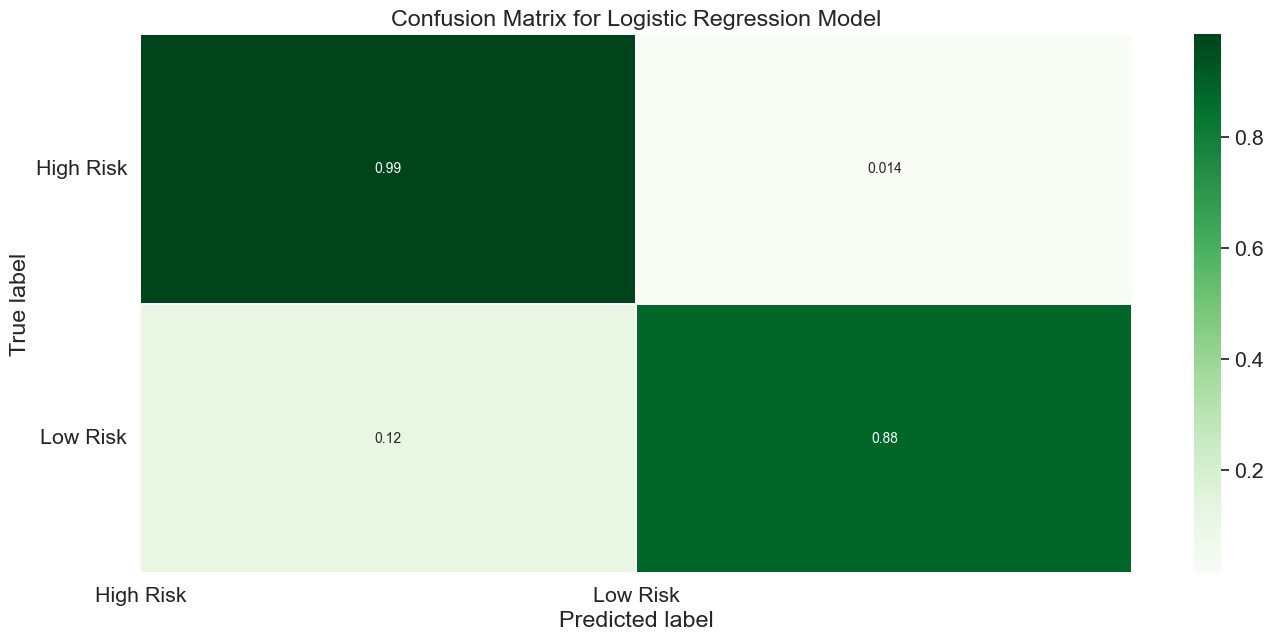

In [42]:
# Confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
y_true = y_test
y_pred = LR_classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [43]:
import statsmodels.api as SM
model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.241221
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1012
Model:                          Logit   Df Residuals:                     1004
Method:                           MLE   Df Model:                            7
Date:                Wed, 24 May 2023   Pseudo R-squ.:                  0.6520
Time:                        22:20:49   Log-Likelihood:                -244.12
converged:                       True   LL-Null:                       -701.46
Covariance Type:            nonrobust   LLR p-value:                3.214e-193
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.1378      0.174    -12.253      0.000      -2.480      -1.796
x2            -0.9835      0.

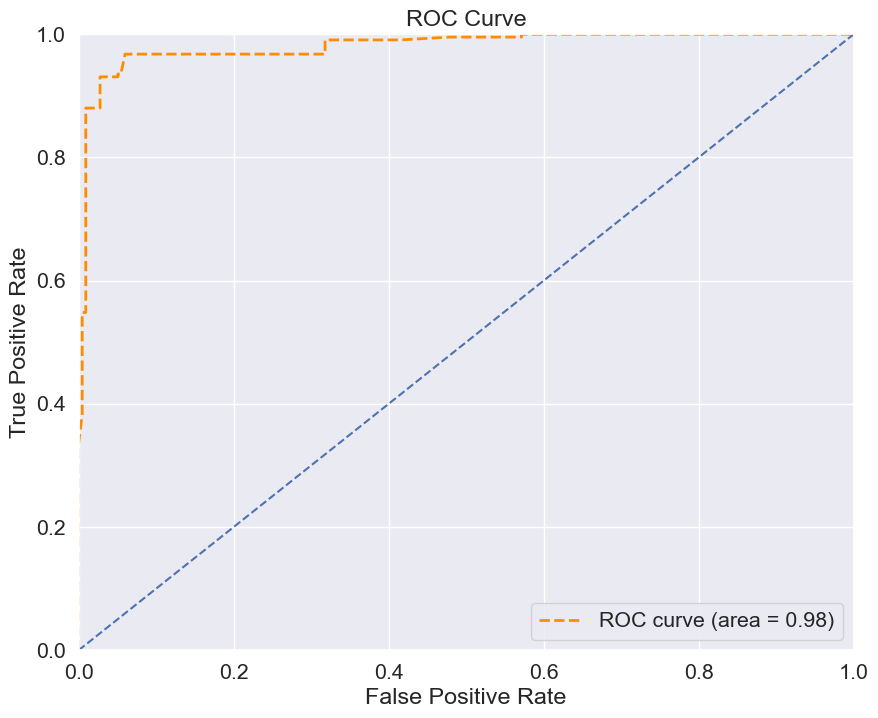

In [44]:
# ROC
y_pred_prob_test = LR_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [45]:
#Testing the significance of the attribute in Logistic Regression Model

importance_lr = LR_classifier.coef_[0]
features_importances_lr = pd.DataFrame({'FeatureName':  df.loc[:,features].columns, 'Logistic Regression Feature Importance': importance_lr})
features_importances_lr.reindex(features_importances_lr['Logistic Regression Feature Importance'].abs().sort_values(ascending=False).index)


,FeatureName,Logistic Regression Feature Importance
5,Thu nhap (trieu vnd),1.311972
0,Hoa don dien/Thang,-1.187625
7,Loai nha o,-0.773868
6,TSĐB,0.488606
3,Thoi gian tai cong viec hien tai,0.463208
1,Gia dinh,-0.403549
2,Muc dich vay,-0.387905
4,Thoi gian vay (Thang),-0.046445


<AxesSubplot: ylabel='FeatureName'>

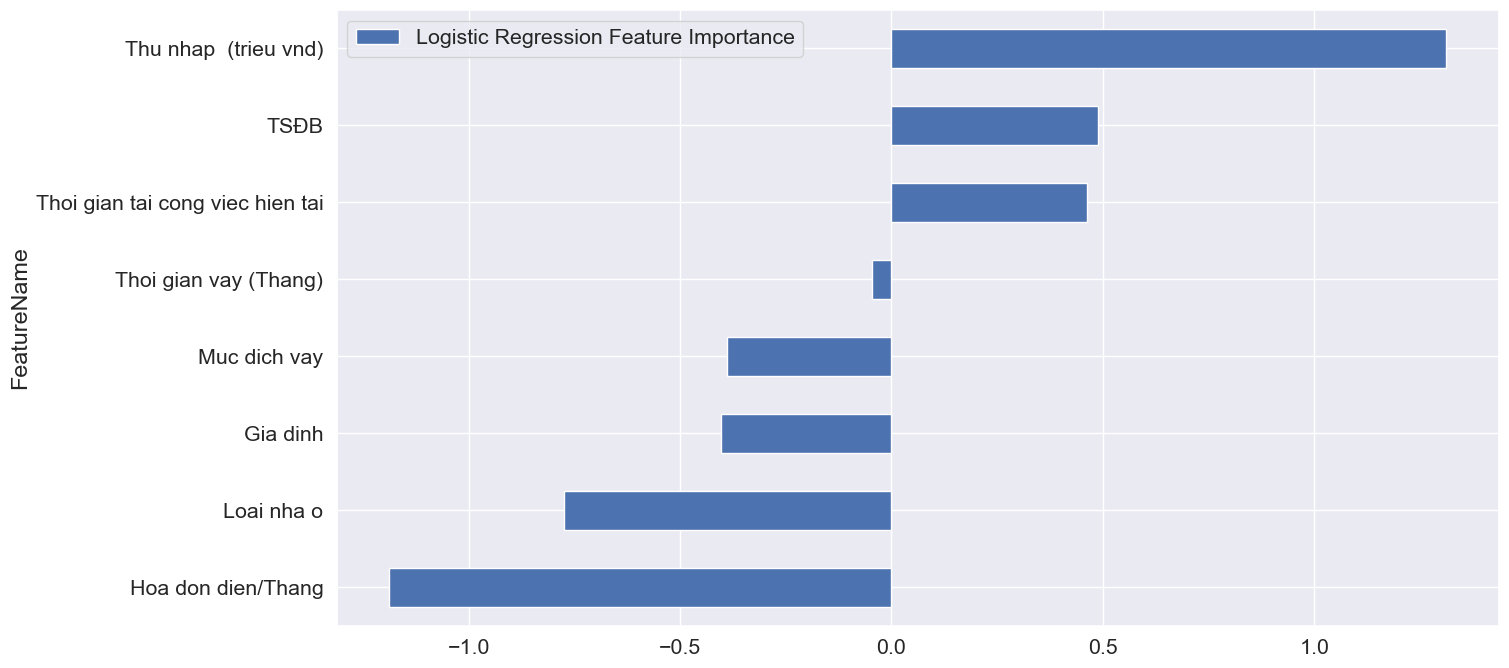

In [46]:
#visualization of Attribute Significance Test in Logistic Regression Model
features_importances_lr.sort_values("Logistic Regression Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Logistic Regression Feature Importance"], kind="barh")

# 8.Decision Tree

In [47]:
DT_classifier = DecisionTreeClassifier(max_depth=4)
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))

print('Decision Tree accuracy: ', round(accuracy_score(y_test, y_pred),2))

Confusion matrix:
     0    1
0  211    6
1    8  209 

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       217
           1       0.97      0.96      0.97       217

    accuracy                           0.97       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.97      0.97      0.97       434

Decision Tree accuracy:  0.97


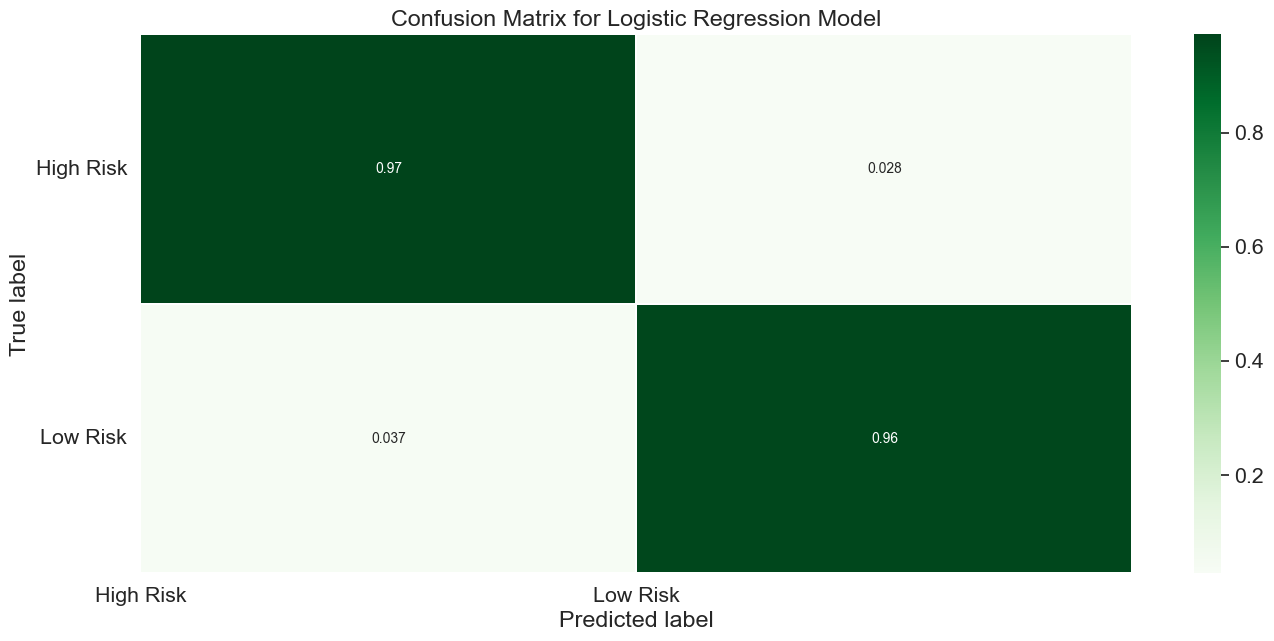

In [48]:
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

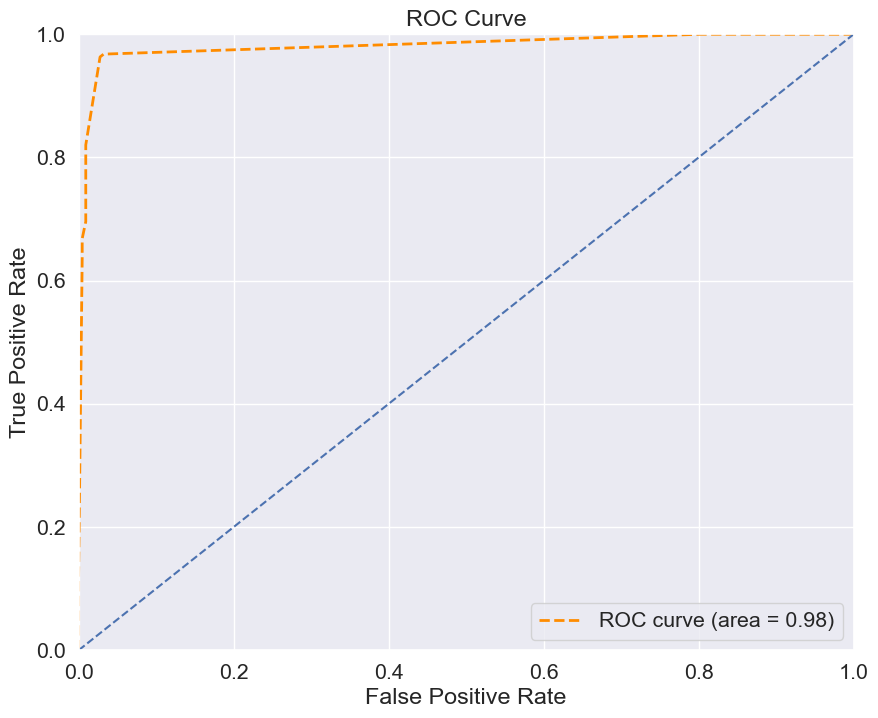

In [49]:
# ROC
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

In [50]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)  

,FeatureName,Decision Tree Feature Importance
6,TSĐB,0.400387
0,Hoa don dien/Thang,0.224891
3,Thoi gian tai cong viec hien tai,0.205392
5,Thu nhap (trieu vnd),0.145511
1,Gia dinh,0.015095
4,Thoi gian vay (Thang),0.008724
2,Muc dich vay,0.000000
7,Loai nha o,0.000000


<AxesSubplot: ylabel='FeatureName'>

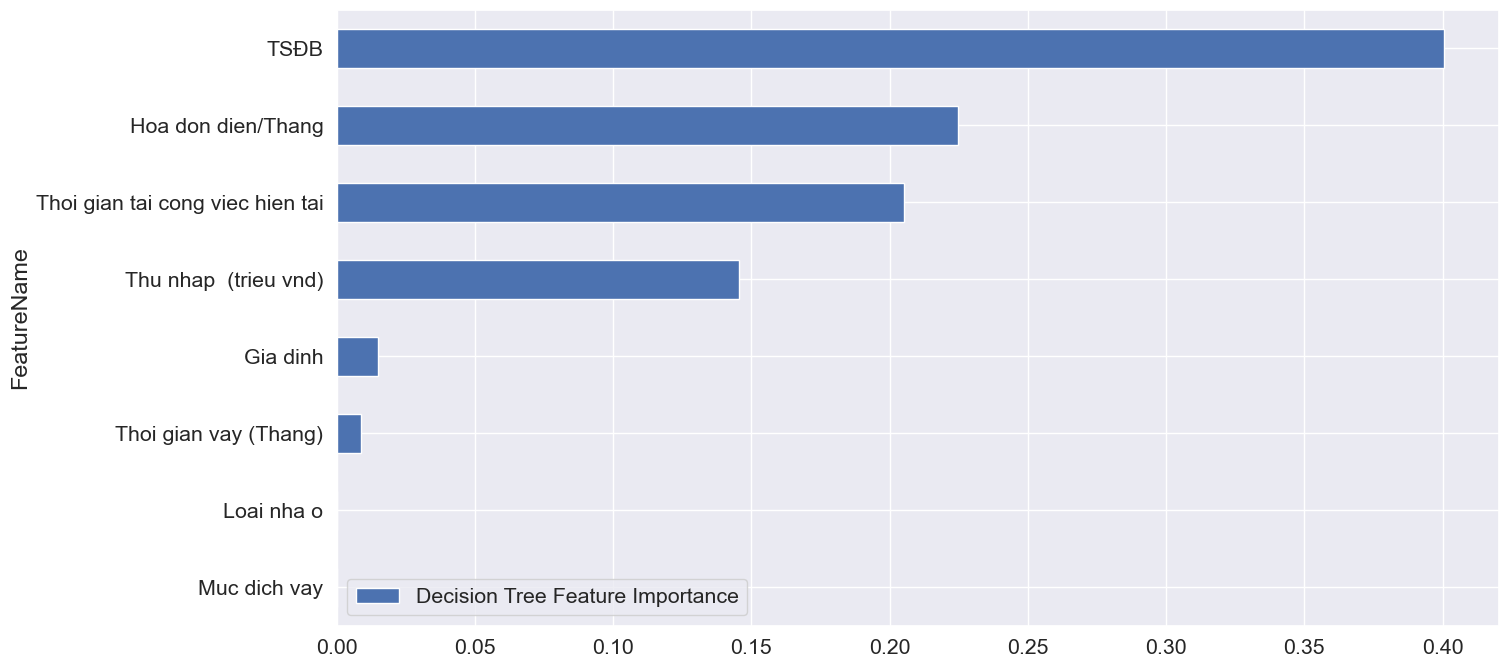

In [51]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

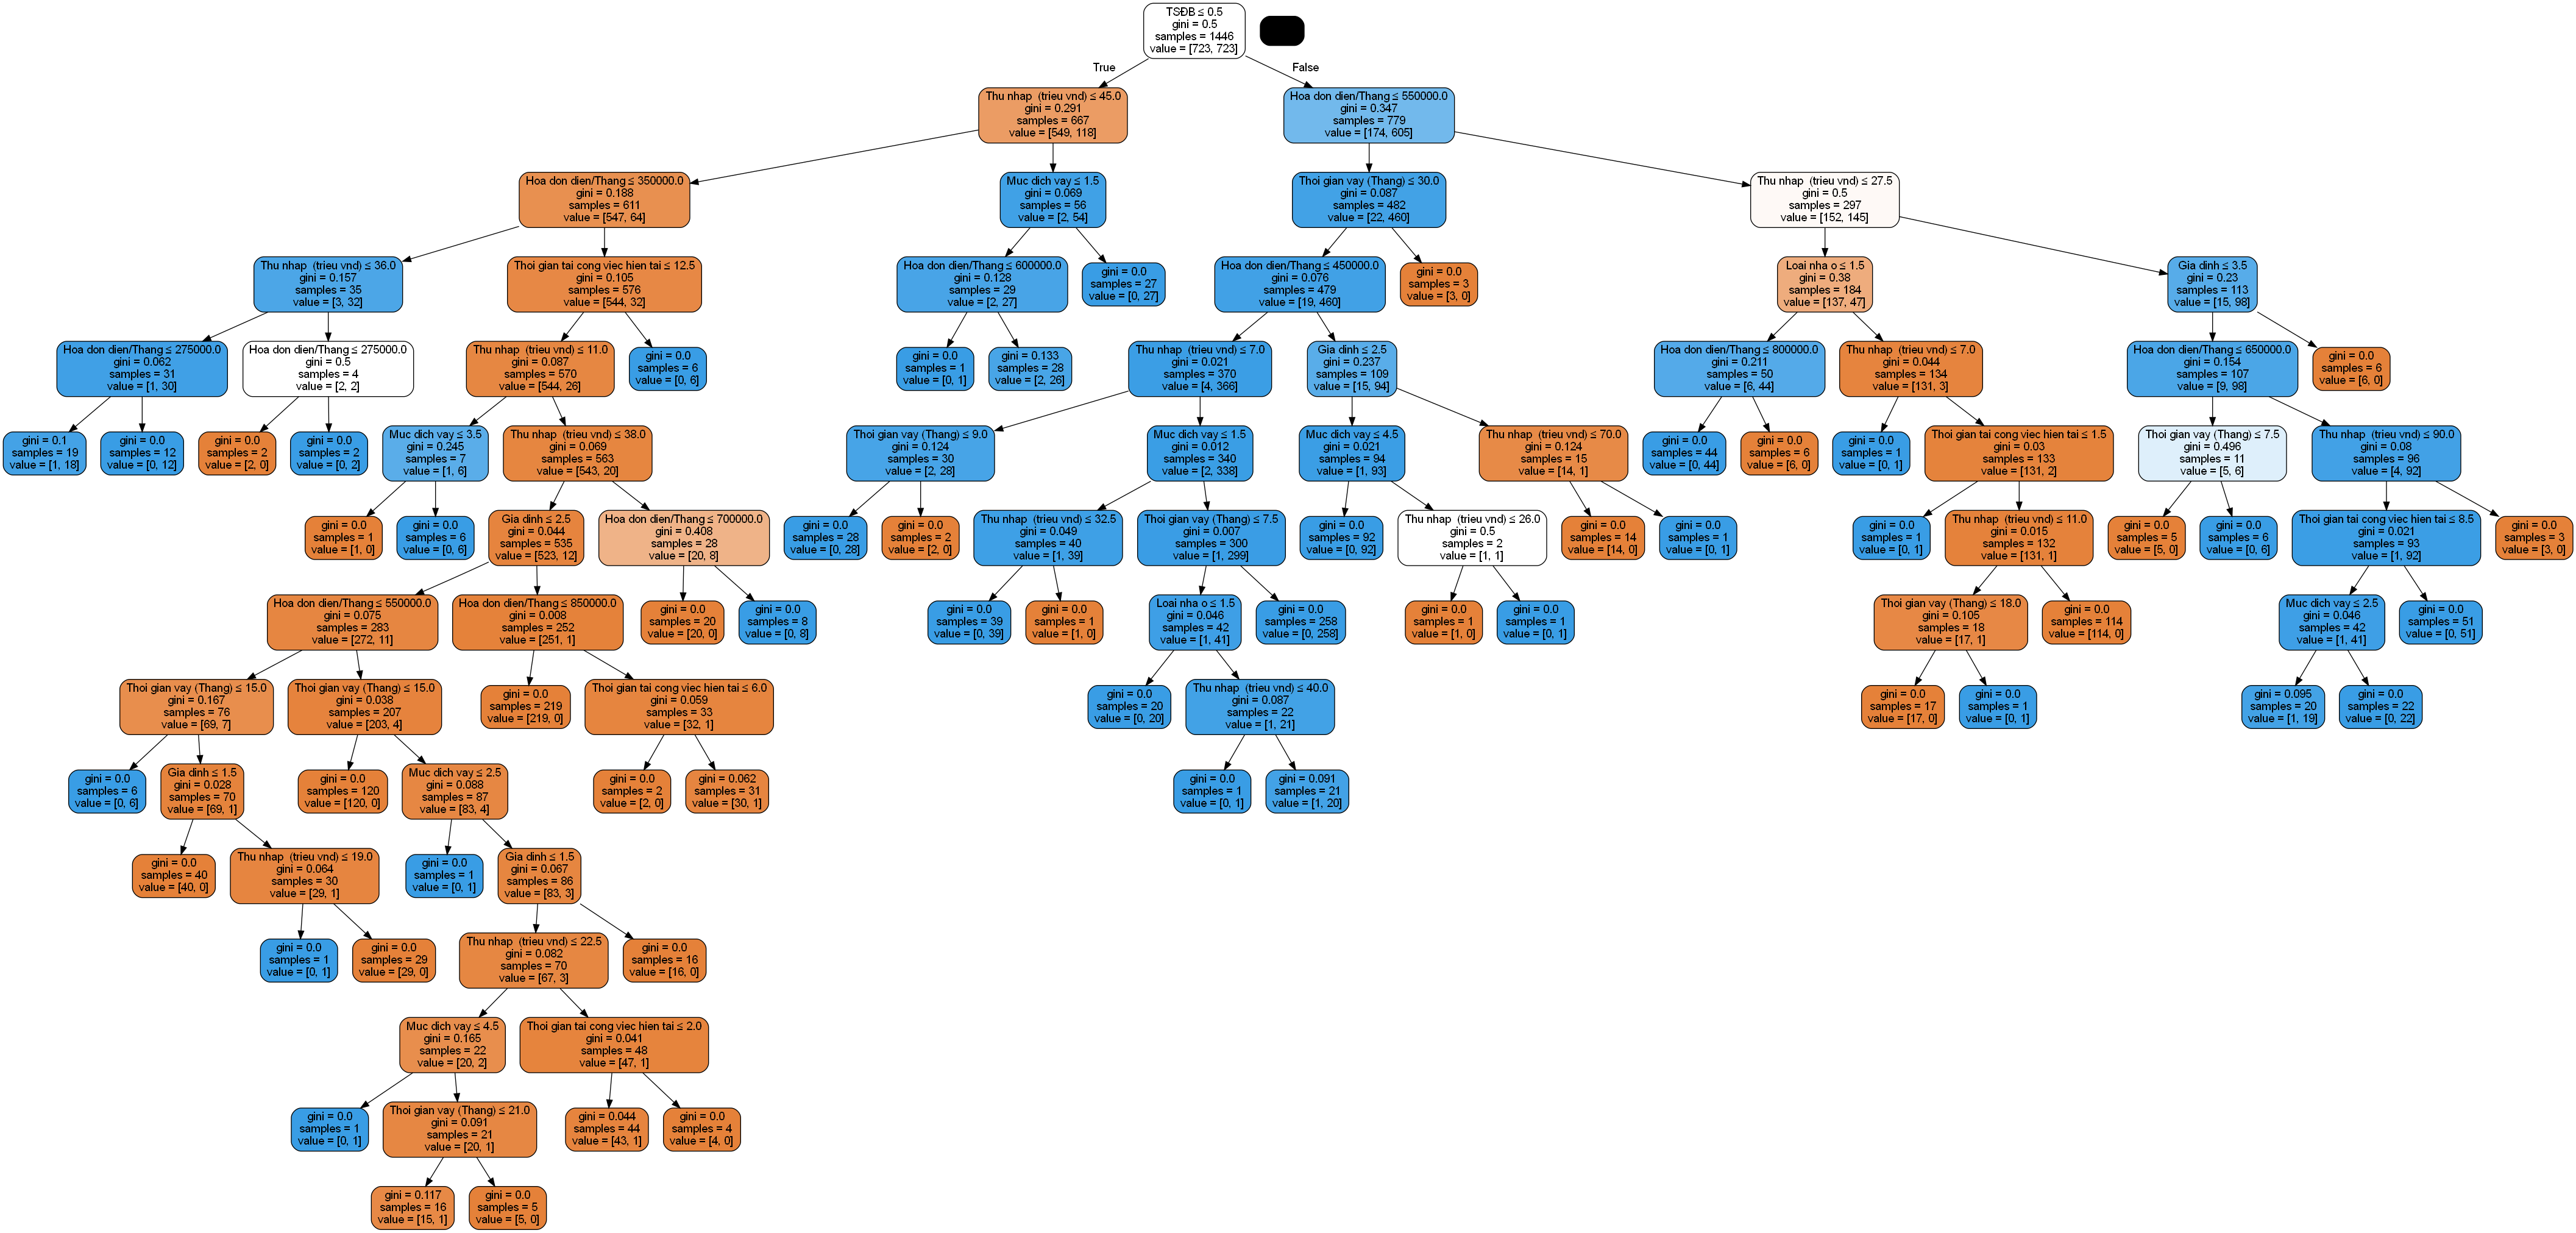

In [52]:
X_plot_tree = df[features]

from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [53]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: Hoa don dien/Thang
X_1: Gia dinh
X_2: Muc dich vay
X_3: Thoi gian tai cong viec hien tai
X_4: Thoi gian vay (Thang)
X_5: Thu nhap  (trieu vnd)
X_6: TSĐB
X_7: Loai nha o


# 9. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[207  10]
 [  3 214]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       217
           1       0.96      0.99      0.97       217

    accuracy                           0.97       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.97      0.97      0.97       434

Random Forest accuracy:  0.9700460829493087


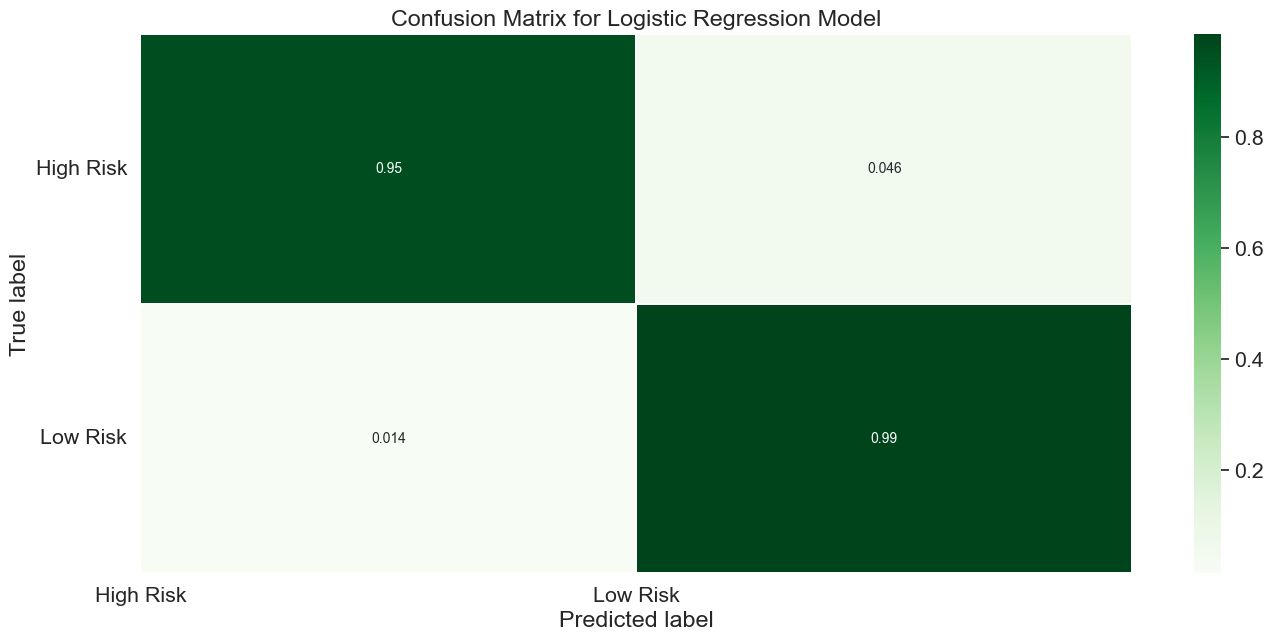

In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
y_true = y_test
y_pred = RF_classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [56]:
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName':df.loc[:,features].columns, 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)

,FeatureName,Random Forest Feature Importance
0,Hoa don dien/Thang,0.263104
5,Thu nhap (trieu vnd),0.252883
6,TSĐB,0.156650
3,Thoi gian tai cong viec hien tai,0.107141
4,Thoi gian vay (Thang),0.065990
1,Gia dinh,0.057799
7,Loai nha o,0.053051
2,Muc dich vay,0.043381


<AxesSubplot: ylabel='FeatureName'>

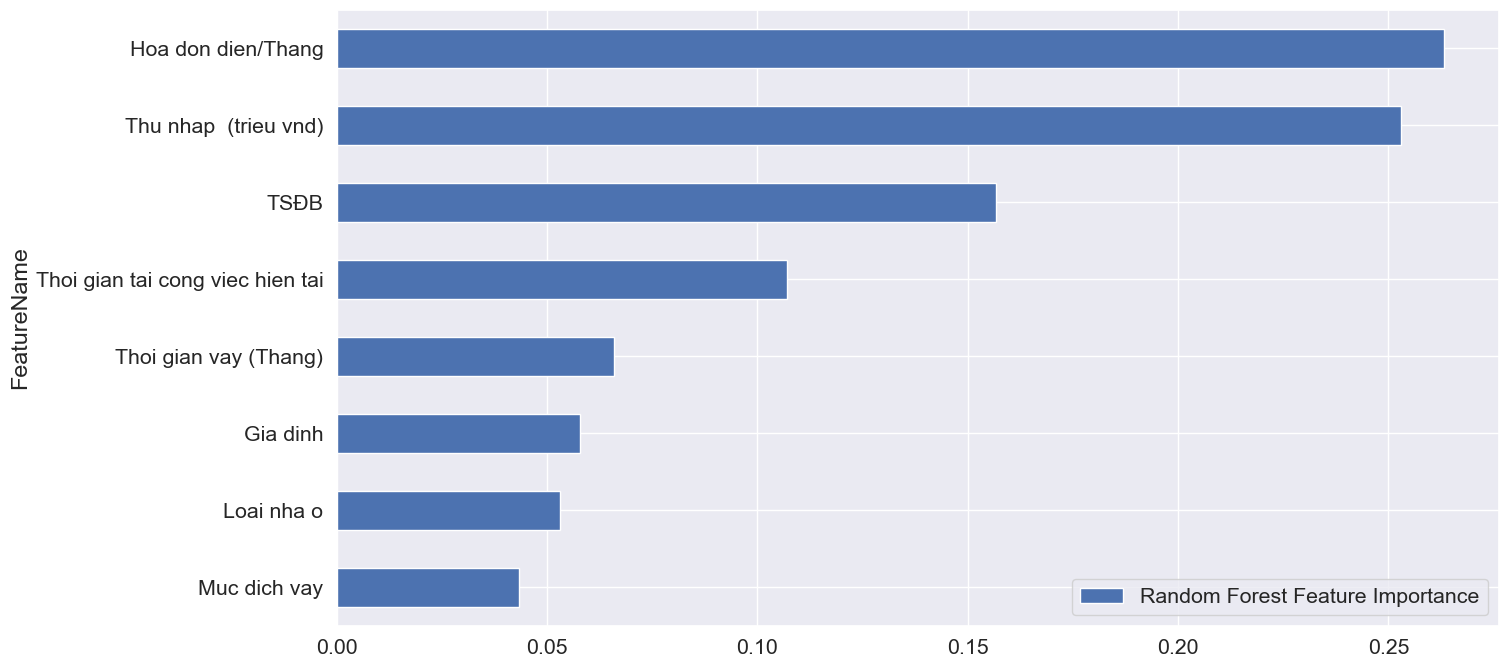

In [57]:
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

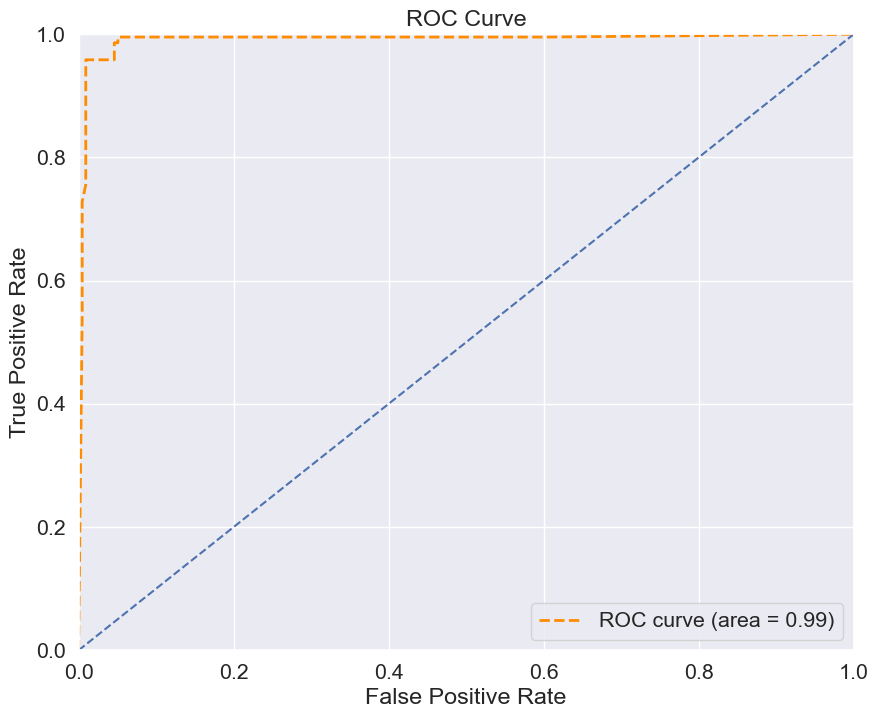

In [58]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

## 10. SVM

In [59]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [60]:
classifier = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('SVM accuracy: ', accuracy_score(y_test, y_pred))

[[215   2]
 [ 34 183]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       217
           1       0.99      0.84      0.91       217

    accuracy                           0.92       434
   macro avg       0.93      0.92      0.92       434
weighted avg       0.93      0.92      0.92       434

SVM accuracy:  0.9170506912442397


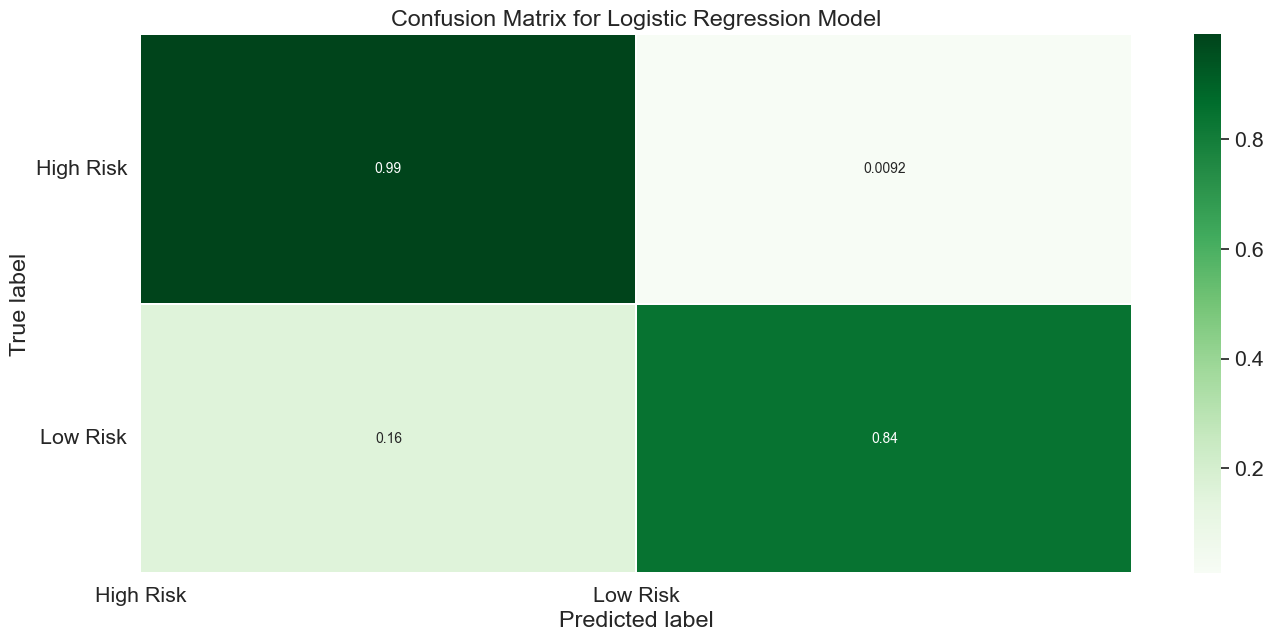

In [61]:
# Confusion matrix
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

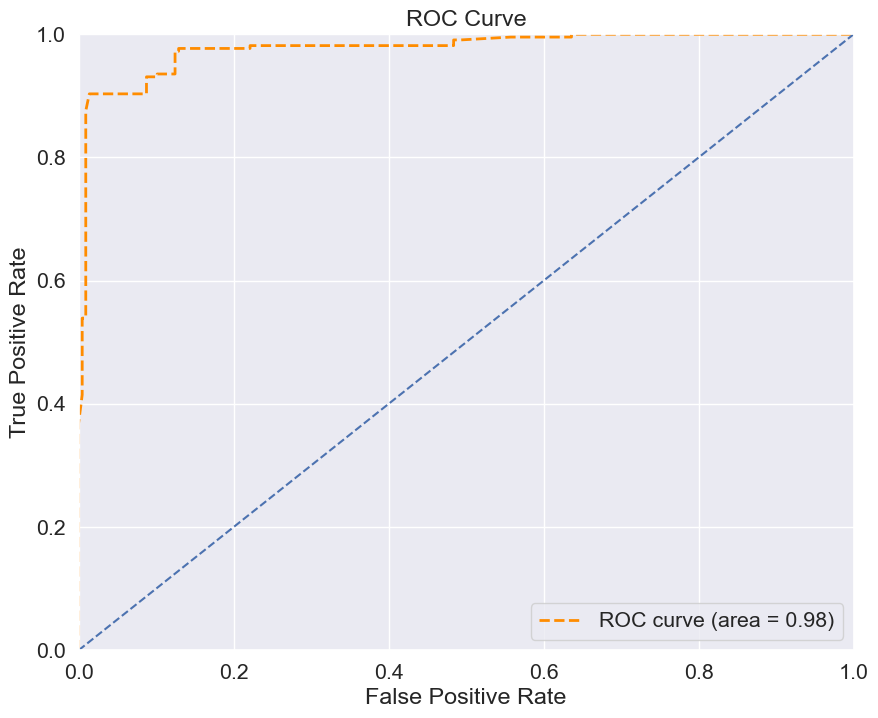

In [62]:
y_pred_prob_test = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# 11. XGB Classifier**

In [63]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [64]:
XGB_classifier = XGBClassifier()
XGB_classifier.fit(X_train, y_train.ravel())

y_pred = XGB_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('XGBoost accuracy: ', accuracy_score(y_test, y_pred))

[[206  11]
 [ 12 205]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       217
           1       0.95      0.94      0.95       217

    accuracy                           0.95       434
   macro avg       0.95      0.95      0.95       434
weighted avg       0.95      0.95      0.95       434

XGBoost accuracy:  0.9470046082949308


In [65]:
importance_xgb = XGB_classifier.feature_importances_
features_importances_xgb = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'XGBoost Feature Importance': importance_xgb})
features_importances_xgb.sort_values(by=['XGBoost Feature Importance'], ascending=False)

,FeatureName,XGBoost Feature Importance
6,TSĐB,0.620847
3,Thoi gian tai cong viec hien tai,0.100861
0,Hoa don dien/Thang,0.098528
5,Thu nhap (trieu vnd),0.057719
7,Loai nha o,0.038154
1,Gia dinh,0.031093
4,Thoi gian vay (Thang),0.030323
2,Muc dich vay,0.022474


<AxesSubplot: ylabel='FeatureName'>

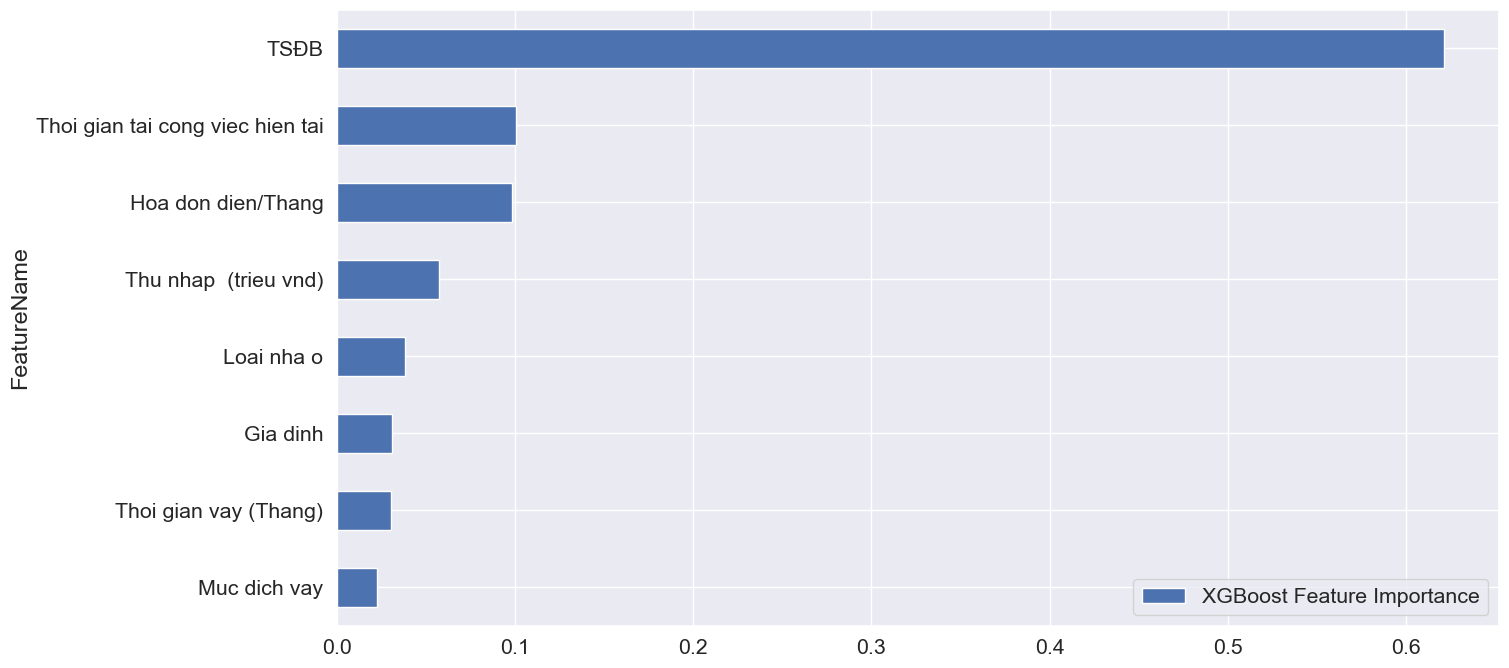

In [66]:
features_importances_xgb.sort_values("XGBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["XGBoost Feature Importance"], kind="barh")

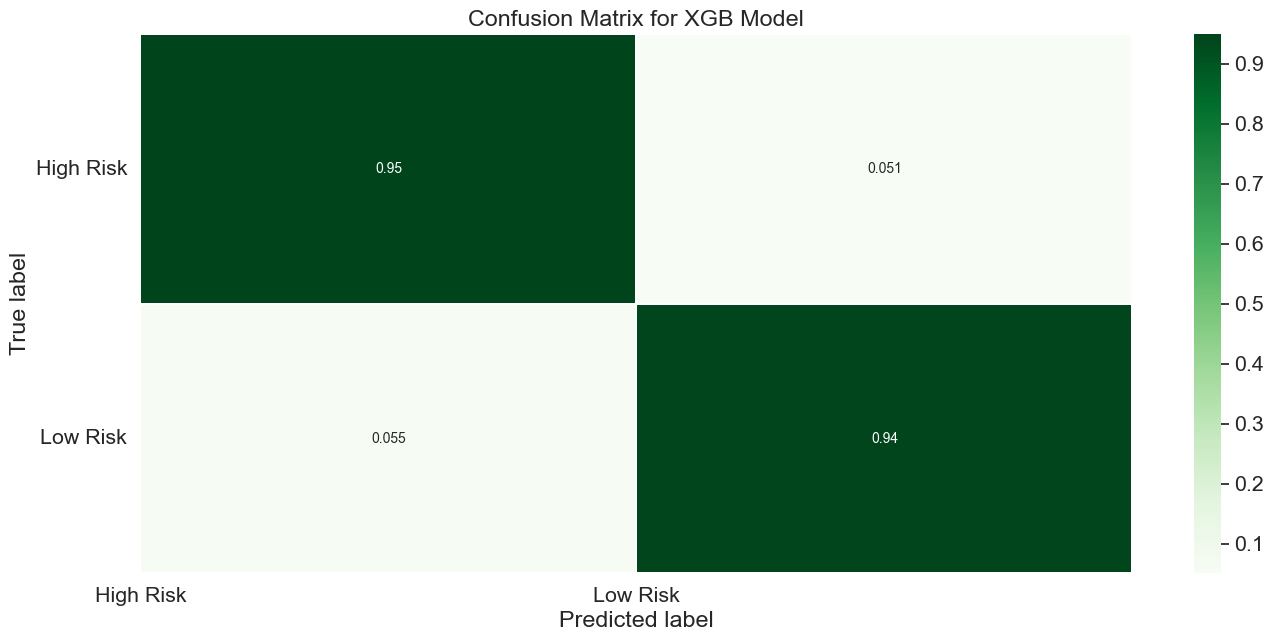

In [67]:
# Confusion matrix
y_true = y_test
y_pred = XGB_classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGB Model')
plt.show()

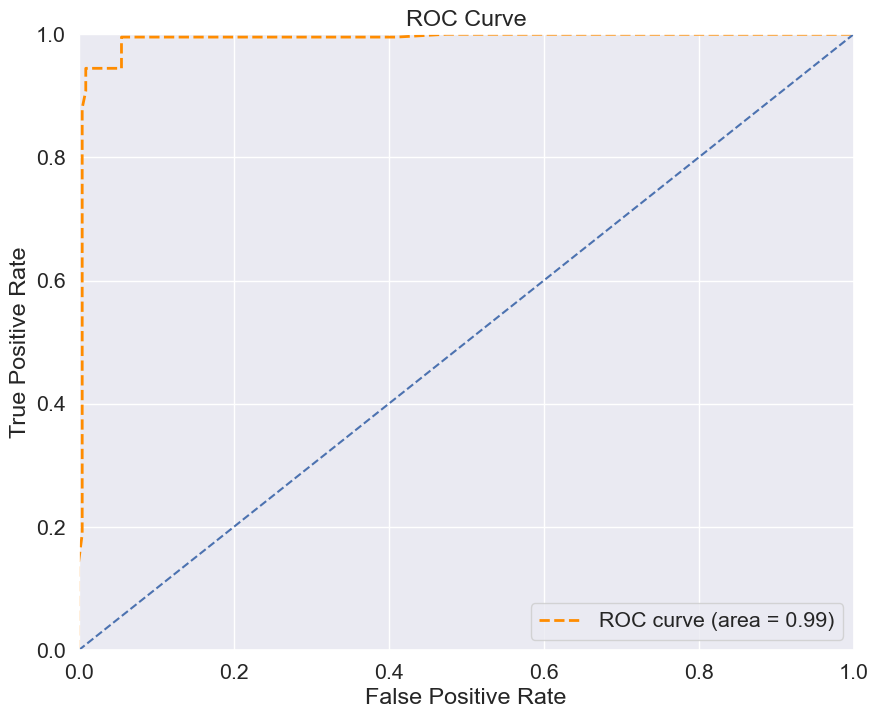

In [68]:
y_pred_prob_test = XGB_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# 8. Ada Boost Classifier**

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train.ravel())

y_pred = ada_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('AdaBoost accuracy: ', accuracy_score(y_test, y_pred))

[[214   3]
 [ 13 204]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       217
           1       0.99      0.94      0.96       217

    accuracy                           0.96       434
   macro avg       0.96      0.96      0.96       434
weighted avg       0.96      0.96      0.96       434

AdaBoost accuracy:  0.9631336405529954


In [71]:
importance_ada = ada_classifier.feature_importances_
features_importances_ada = pd.DataFrame({'FeatureName': df.loc[:,features].columns, 'AdaBoost Feature Importance': importance_ada})
features_importances_ada.sort_values(by=['AdaBoost Feature Importance'], ascending=False)

,FeatureName,AdaBoost Feature Importance
0,Hoa don dien/Thang,0.32
5,Thu nhap (trieu vnd),0.24
3,Thoi gian tai cong viec hien tai,0.18
4,Thoi gian vay (Thang),0.08
6,TSĐB,0.06
7,Loai nha o,0.06
1,Gia dinh,0.04
2,Muc dich vay,0.02


<AxesSubplot: ylabel='FeatureName'>

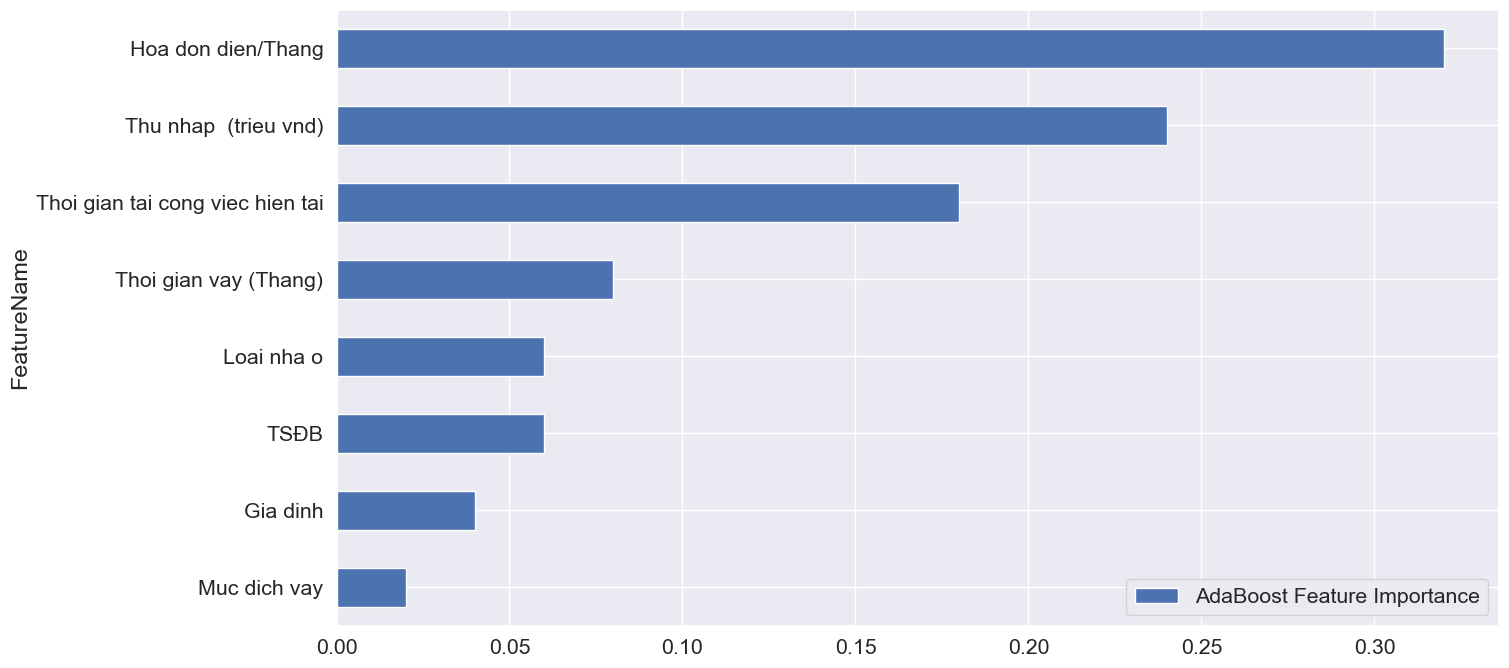

In [72]:
features_importances_ada.sort_values("AdaBoost Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["AdaBoost Feature Importance"], kind="barh")

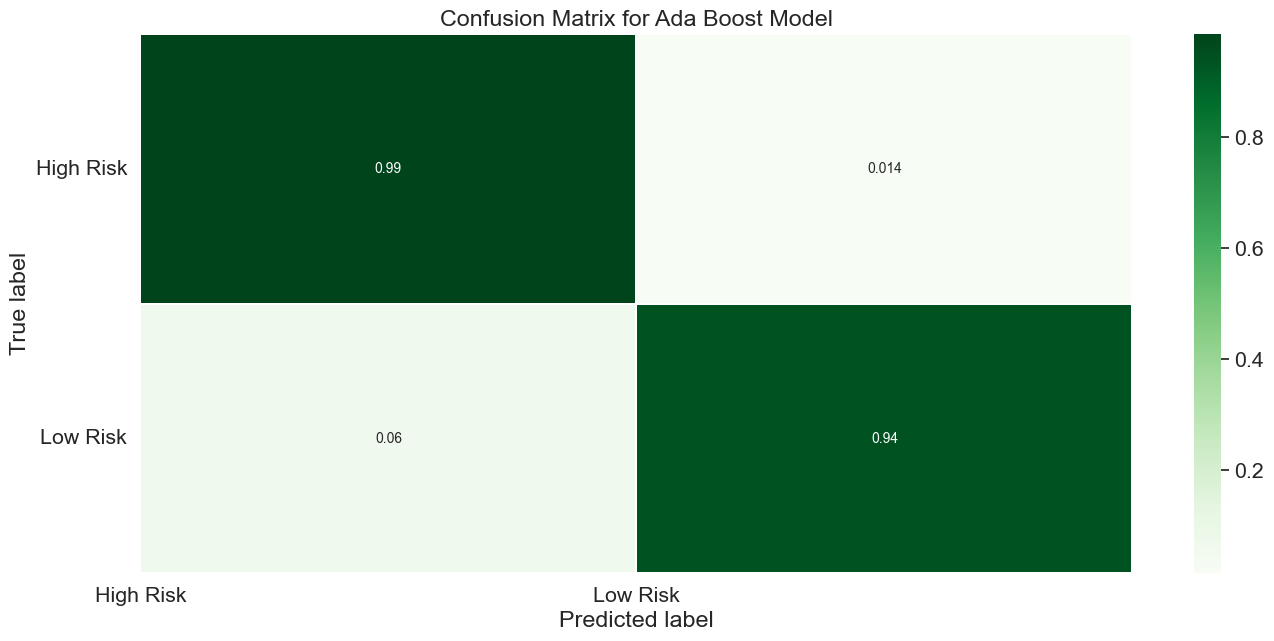

In [73]:
# Confusion matrix
y_true = y_test
y_pred = ada_classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [ 'High Risk','Low Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Ada Boost Model')
plt.show()

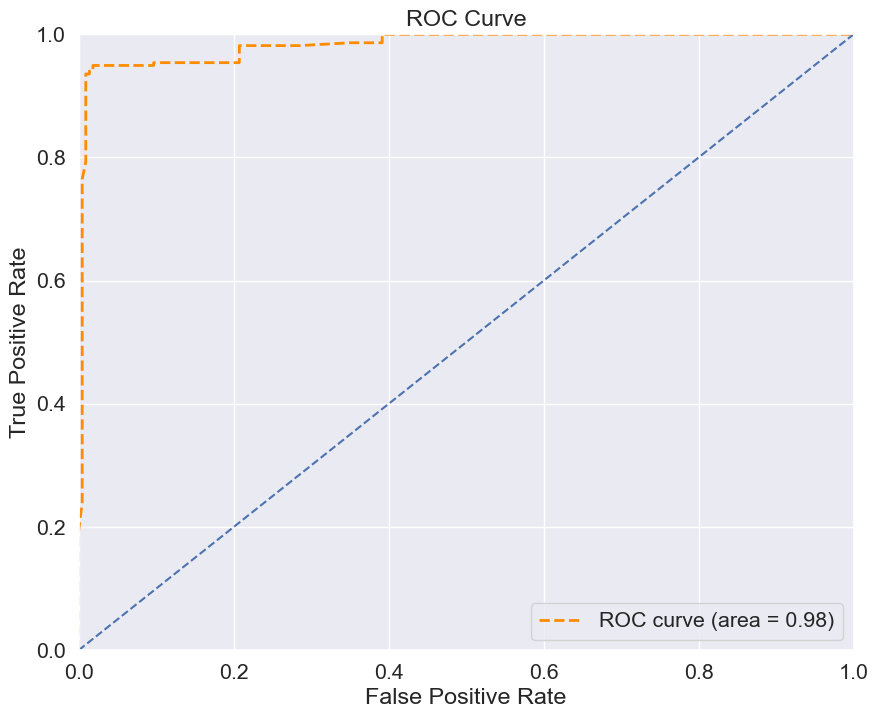

In [74]:
y_pred_prob_test = ada_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# 11. Effective comparison of models

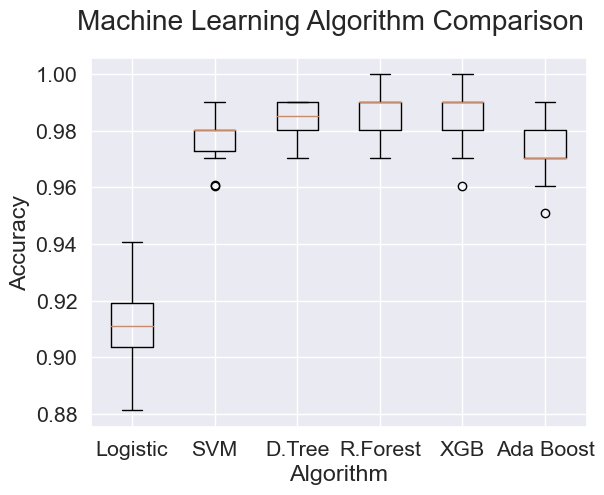

In [75]:
models = [
    ('Logistic', LogisticRegression()),
    ('SVM', SVC()),
    ('D.Tree', DecisionTreeClassifier()),
    ('R.Forest', RandomForestClassifier()),
    ('XGB',XGBClassifier()),
    ('Ada Boost',AdaBoostClassifier())
]

# Evaluate each model on the test set using 10-fold cross-validation and store the results
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)

# Generate a boxplot comparing the model performance
fig = plt.figure()
fig.suptitle('Machine Learning Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()


## VIII. PREDICT NEW CUSTOMER

In [76]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [77]:
# Dự đoán khách hàng mới với mô hình RandomForest
RF_classifier= RandomForestClassifier()
RF_classifier.fit(X_train.values, y_train.values.ravel())

RandomForestClassifier()

In [78]:
import random
random_number = random.randrange(0, 100, 1)
random_number

32

In [79]:
X_test.columns

Index(['Hoa don dien/Thang', 'Gia dinh', 'Muc dich vay',
       'Thoi gian tai cong viec hien tai', 'Thoi gian vay (Thang)',
       'Thu nhap  (trieu vnd)', 'TSĐB', 'Loai nha o'],
      dtype='object')

In [80]:
sample_test = X_test.iloc[random_number].values
sample_test = sample_test.tolist()
sample_test

[400000, 4, 5, 5, 24, 100, 1, 2]

In [81]:
print(RF_classifier.predict([sample_test]))

[1]


In [82]:
# Dự đoán khách hàng mới với mô hình XGBoost
classifier_0 = XGBClassifier()
classifier_0.fit(X_train.values, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [83]:
X_test.columns

Index(['Hoa don dien/Thang', 'Gia dinh', 'Muc dich vay',
       'Thoi gian tai cong viec hien tai', 'Thoi gian vay (Thang)',
       'Thu nhap  (trieu vnd)', 'TSĐB', 'Loai nha o'],
      dtype='object')

In [84]:
sample_test_0 = X_test.iloc[random_number].values
sample_test_0 = sample_test_0.tolist()
sample_test_0

[400000, 4, 5, 5, 24, 100, 1, 2]

In [85]:
print(classifier_0.predict([sample_test_0]))

[1]


* Dự đoán với tất cả các thuộc tính của bộ dữ liệu.

In [86]:
target_1 = ['Kha nang tra no']
features_1 = list(set(list(df.columns)) - set(target_1))

In [87]:
X = df[features_1]
y = df[target_1]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.2, random_state=42)

In [88]:
# Dự đoán khách hàng mới với mô hình RandomForest
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train_1.values, y_train_1.values.ravel())

RandomForestClassifier()

In [89]:
X_test_1.columns

Index(['TSĐB', 'Thoi gian vay (Thang)', 'Thoi gian tai cong viec hien tai',
       'Tuoi ', 'Gia dinh', 'Loai nha o', 'Thu nhap  (trieu vnd)',
       'So tien vay (trieu vnd)', 'Hoa don dien/Thang', 'Muc dich vay',
       'Quốc tịch', 'Gioi tinh'],
      dtype='object')

In [90]:
sample_test_1 = X_test_1.iloc[random_number].values
sample_test_1 = sample_test_1.tolist()
sample_test_1

[1, 24, 5, 42, 4, 2, 100, 700, 400000, 5, 1, 2]

In [92]:
print(RF_classifier.predict([sample_test_1]))

[1]
